## Stock Price Prediction 
 
  
  
  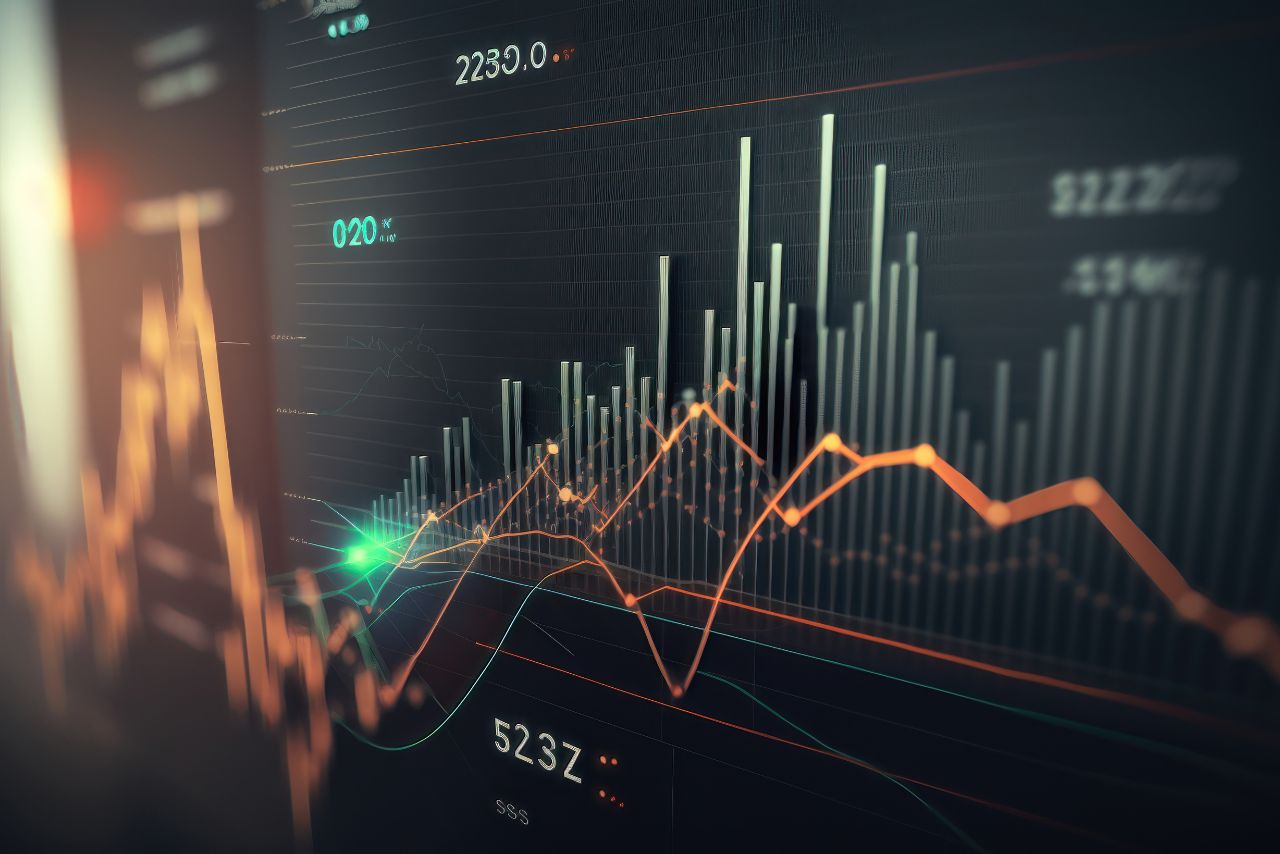
  
### Stock Price 



- Refers to the current market value of a publicly traded company's shares. It represents the price at which investors are willing to buy or sell those shares in the stock market. Stock prices are influenced by various factors, including the company's financial performance, industry trends, market sentiment, economic conditions, and investor expectations.

- The business scenario surrounding a stock price is dependent on the specific company and its industry. Each company operates within a unique environment, faces its own challenges and opportunities, and operates based on its business model and strategy.
  
  
### Key Objectives

**Key objectives for a company can vary, but generally include:**

1. Revenue and Profit Growth: Companies aim to increase their revenue and profits over time, indicating a healthy business performance. This objective is typically achieved through various strategies, such as expanding into new markets, introducing innovative products or services, or improving operational efficiency. For example, a technology company might aim to increase its market share by launching a new line of cutting-edge products.
  
2. Market Leadership: Many companies strive to become market leaders within their industry. This objective involves outperforming competitors in terms of market share, brand recognition, customer loyalty, and overall industry influence. For instance, a beverage company might aim to become the top-selling brand in its category by implementing effective marketing campaigns and maintaining a strong distribution network.
  
3. Customer Satisfaction and Retention: Companies recognize the importance of satisfying their customers and retaining their loyalty. They strive to deliver high-quality products or services, provide excellent customer service, and establish strong relationships with their customer base. An example of this objective would be an e-commerce company investing in enhancing its website's user experience and implementing a responsive customer support system.

  
  
### Dataset

#### Rows Information 

* The data set is consists of 1009 rows. 

#### Columns information 

* The data set is consists of 7 columns namely: Date, Opening Price, High, low, Closing Price, Adjusted Close, and Volume.  

   1. Date: This column represents the date on which the stock price data was recorded. It serves as a reference point for each entry in the dataset.

   2. Opening Price =  The price at which a stock starts trading at the beginning of a particular trading session, typically at the start of the trading day.

   3. High =  Refers to the highest price at which a stock was traded during a given trading session. It represents the peak value reached by the stock's price within that period.
   4. Low =  Indicates the lowest price at which a stock was traded during a specific trading session. It represents the lowest value reached by the stock's price within that period.

   5. Closing Price =  The final price at which a stock is traded during a trading session, usually at the end of the trading day. It signifies the last transaction made before the market closes.

   6. Adjusted Close =  The adjusted close price is the closing price adjusted for events such as stock splits, dividends, or other corporate actions. It provides a more accurate representation of the stock's true performance over time.
   7. Volume =  Refers to the total number of shares or contracts traded during a specific trading session. It indicates the level of market activity and liquidity for a particular stock. Volume is often measured in terms of the number of shares traded.


### Task

* Our task is to  forecast the future closing prices for these stocks with our Data Science skills for the next days/months/years.



In [1]:
# importing packages

import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline 
import matplotlib.pyplot as plt


### Data Cleaning

<ul>
<li>Step 1: Importing the dataset
<li>Step 2: Exploring Data
<li>Step 3: Handling Missing Values
<li>Step 4: Handling Duplicates 
<li>Step 5: Checking column data types    
<li>Step 6: Handling outliers 
</ul>

#### Step1: Importing the dataset

In [2]:
# importing the dataset to Pandas DataFrame: dataset

stock_df = pd.read_csv('Stock_Price_data_set.csv')

In [3]:
# display the first 5 rows in DataFrame: dataset
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
#display last five rows of the DataFrame: stock_df
stock_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


#### Step 2: Exploring Data

In [5]:
# Check the number of rows and  number of columns in Pandas DataFrame: stock_df
stock_df.shape

(1009, 7)

In [6]:
# check the row index labels of Pandas DataFrame: stock_df
stock_df.index

RangeIndex(start=0, stop=1009, step=1)

In [7]:
# Check the column labels of Pandas DataFrame: stock_df
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# Get the concise summary of DataFrame: stock_df
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
# Get the statistical summary of numeric columns of DataFrame: stock_df
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [10]:
stock_df.describe(include =  'all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
unique,1009,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-01-11,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,NaN,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,NaN,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,NaN,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,NaN,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,NaN,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06



#### Step 3: Handling Missing Values

Datasets can contain missing values. This can be handled in 2 ways:

1. Remove missing values. Rows or columns containing missing values can be removed.
2. Replacing the missing values with new values.


In [11]:
# finding missing values using any() in columns of the DataFrame: stock_df
stock_df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [12]:
# finding the number of missing values in each of the columns of the DataFrame: stock_df
stock_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Step 4: Handling Duplicates

In [13]:
# find the number of duplicate records the DataFrame: stock_df
stock_df.duplicated().sum()

0

In [14]:
# get the duplicate records in the DataFrame: stock_df
stock_df[stock_df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [15]:
# Dropping the adj Close column as it has the same values as Close column, so no need to keep dulpicate values in our dataset

stock_df.drop('Adj Close',axis = 1, inplace = True)

In [16]:
# Cheking whether the Adj Close column has dropped or no 
stock_df.head(3)

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500


#### Step 5: Checking column data types

In [17]:
# get the data types of all columns of the DataFrame: stock_df
stock_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [18]:
# As the Date column data type is Object we ought to convert it into date time data type

stock_df['Date'] = pd.to_datetime(stock_df.Date)

#### Step 6: Handling outliers

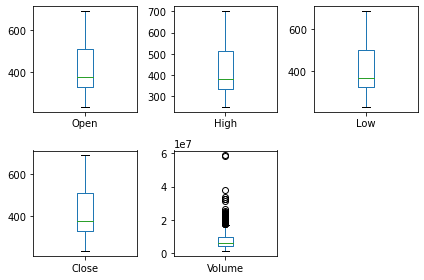

In [19]:
# box-plot for all numerical columns of the DataFrame: stock_df


# box plot for Open
plt.subplot(2,3,1) 
stock_df['Open'].plot(kind='box') 

# box plot for High
plt.subplot(2,3,2) 
stock_df['High'].plot(kind='box') 

# box plot for Low
plt.subplot(2,3,3) 
stock_df['Low'].plot(kind='box') 

# box plot for Close
plt.subplot(2,3,4) 
stock_df['Close'].plot(kind='box') 

# box plot for Volume
plt.subplot(2,3,5) 
stock_df['Volume'].plot(kind='box') 

plt.tight_layout()

##### Handling outliers of Volume's column of the DataFrame: stock_df

In [20]:
# finding the upper and lower limit of Volume's column

def find_outlier_limits(col_name):
    Q1,Q3= stock_df[col_name].quantile([.25,.75]) # Q1 --> first quartile 25% of data. Q3 --> third quartile 75% of data 
    IQR = Q3-Q1                   # Inter quartile range 
    low = Q1-(1.5* IQR)              # 1.5 = 150%  
    high = Q3+(1.5* IQR)
    return (high,low)

high_vol,low_vol = find_outlier_limits('Volume')
print('Volume: ','upper limit: ',high_vol,' lower limit: ',low_vol)


# Replacing outlier values in Voume column with respective 
# upper and lower limits

stock_df.loc[stock_df['Volume']> high_vol,'Volume'] = high_vol
stock_df.loc[stock_df['Volume']< low_vol,'Volume'] = low_vol

Volume:  upper limit:  17168150.0  lower limit:  -3753850.0


#### Any value greater than upper limit (17168150.0)  or lower than lower limit (3753850.0) will be considered as outlier.

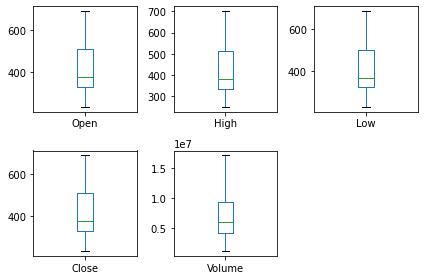

In [21]:
# Checking whether the outliers have been replaced with the upper and lower limit or no


# box plot for Open
plt.subplot(2,3,1) 
stock_df['Open'].plot(kind='box') 

# box plot for High
plt.subplot(2,3,2) 
stock_df['High'].plot(kind='box') 

# box plot for Low
plt.subplot(2,3,3) 
stock_df['Low'].plot(kind='box') 

# box plot for Close
plt.subplot(2,3,4) 
stock_df['Close'].plot(kind='box') 

# box plot for Volume
plt.subplot(2,3,5) 
stock_df['Volume'].plot(kind='box') 

plt.tight_layout()

In [22]:
stock_df 

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,17168150
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,17168150
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


### Data Understanding


    Q1: What is the average opening price of the stocks?
    Q2: What is the lowest closing price recorded in the dataset?
    Q3: How many trading days are represented in the dataset?
    Q4: How does the opening price compare to the closing price on a daily basis?
    Q5: What is the standard deviation of the closing prices?
    Q6: How many days did the stock price close lower than the opening price?
    Q7: What is the maximum difference between the high and low prices?
    Q8: How many days had a closing price higher than the previous day's closing price?
    Q9: How does the daily price range (difference between high and low prices) vary over time?
    Q10: What is the percentage change in the closing price from the first day to the last day?
    Q11: How many days experienced a price increase compared to the previous day?
    Q12: What is the average closing price on Fridays?
    Q13: What is the average volume of stocks traded on days when the closing price was higher than the opening price?
    Q14: What is the average percentage change in the closing price from one day to the next?
    Q15: What is the relationship between the closing price and trading volume?
    Q16: On which date did the stock experience the largest intraday price range (difference between the high and low prices), and what was the corresponding trading volume?
    Q17: How many days did the stock experience a gap-up opening (opening price higher than the previous day's closing price)?


In [23]:
# What is the average opening price of the stocks?

average_opening_price = stock_df['Open'].mean()
print("Average opening price:", average_opening_price)

Average opening price: 419.05967286223984


In [24]:
# What is the lowest closing price recorded in the dataset?

lowest_closing_price = stock_df['Close'].min()
print("Lowest closing price:", lowest_closing_price)

Lowest closing price: 233.880005


In [25]:
# How many trading days are represented in the dataset?

trading_days = stock_df['Date'].nunique()
print("Number of trading days:", trading_days)

Number of trading days: 1009


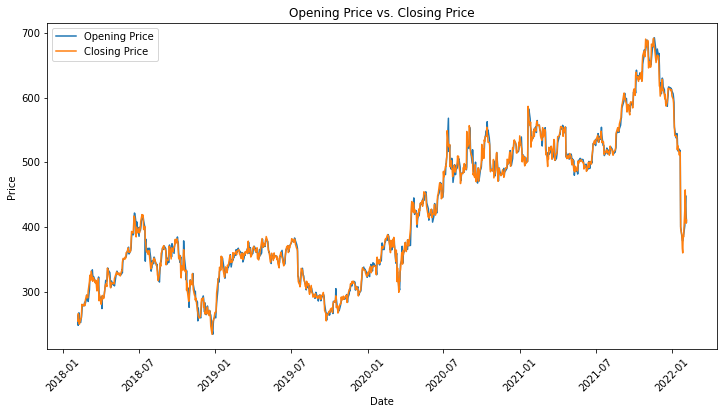

In [26]:
# How does the opening price compare to the closing price on a daily basis?

plt.figure(figsize=(12, 6))
plt.plot(stock_df['Date'], stock_df['Open'], label='Opening Price')
plt.plot(stock_df['Date'], stock_df['Close'], label='Closing Price')
plt.title("Opening Price vs. Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Insight:

* The provided visualization shows how the opening price and closing price of the stock compare to each other on a daily basis.

1. When the closing price is higher than the opening price, it typically indicates that the stock price increased during the day. This is often interpreted as a positive or bullish signal, suggesting that buyers were more active and willing to pay a higher price for the stock.

2. On the other hand, when the closing price is lower than the opening price, it generally indicates that the stock price decreased during the day. This is often seen as a negative or bearish signal, suggesting that sellers were more dominant, resulting in a decline in the stock price.

In [27]:
# What is the standard deviation of the closing prices?

closing_price_std = stock_df['Close'].std()
print("Closing price standard deviation:", closing_price_std)

Closing price standard deviation: 108.28999877034997


In [28]:
# How many days did the stock price close lower than the opening price?

lower_closing_days = len(stock_df[stock_df['Close'] < stock_df['Open']])
print("Number of days with lower closing price than opening price:", lower_closing_days)

Number of days with lower closing price than opening price: 506


In [29]:
# What is the maximum difference between the high and low prices?

price_difference = stock_df['High'] - stock_df['Low']
max_price_difference = price_difference.max()
print("Maximum difference between high and low prices:", max_price_difference)

Maximum difference between high and low prices: 56.959991


In [30]:
# How many days had a closing price higher than the previous day's closing price?

higher_closing_than_previous = len(stock_df[stock_df['Close'] > stock_df['Close'].shift(1)])
print("Number of days with a higher closing price than the previous day:", higher_closing_than_previous)

Number of days with a higher closing price than the previous day: 516


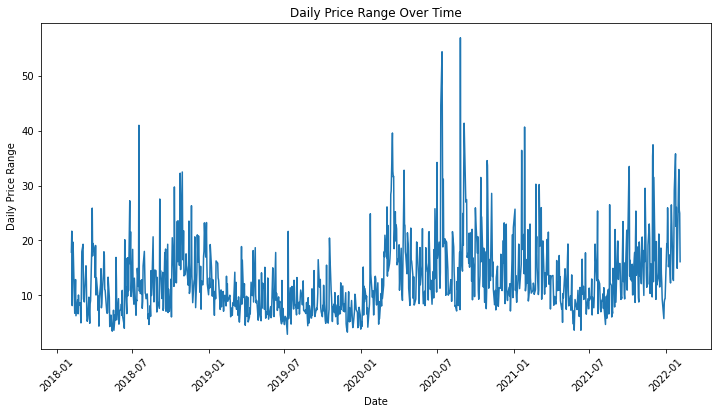

In [31]:
# How does the daily price range (difference between high and low prices) vary over time?

plt.figure(figsize=(12, 6))
plt.plot(stock_df['Date'], stock_df['High'] - stock_df['Low'])
plt.title("Daily Price Range Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Price Range")
plt.xticks(rotation=45)
plt.show()

### Insight:

* The provided visualization displays how the difference between the highest and lowest prices of the stock, known as the daily price range, changes over time. By looking at the plot, you can easily see how much the stock's price fluctuates on a daily basis throughout the given time period. This information helps in understanding the stock's volatility and how much it tends to move up or down in a single day.

In [32]:
# What is the percentage change in the closing price from the first day to the last day?

first_closing_price = stock_df['Close'].iloc[0]
last_closing_price = stock_df['Close'].iloc[-1]
percentage_change = ((last_closing_price - first_closing_price) / first_closing_price) * 100
print("Percentage change in closing price:", percentage_change)


Percentage change in closing price: 61.31913044362326


In [33]:
# How many days experienced a price increase compared to the previous day?

price_increase_days = len(stock_df[stock_df['Close'] > stock_df['Close'].shift(1)])
print("Number of days with a price increase compared to the previous day:", price_increase_days)

Number of days with a price increase compared to the previous day: 516


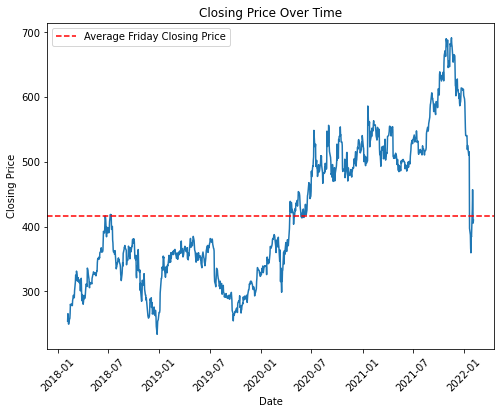

Average closing price on Fridays: 416.27357968656713


In [34]:
# What is the average closing price on Fridays?

friday_closing_avg = stock_df[stock_df['Date'].dt.dayofweek == 4]['Close'].mean()

plt.figure(figsize=(8, 6))
plt.plot(stock_df['Date'], stock_df['Close'])
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.axhline(y=friday_closing_avg, color='r', linestyle='--', label='Average Friday Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

print("Average closing price on Fridays:", friday_closing_avg)

### Memo:

* In Python's datetime library, the day-of-week index starts from Monday (0) and ends on Sunday (6). Therefore, the index for Friday is indeed 4.

In [35]:
# What is the average volume of stocks traded on days when the closing price was higher than the opening price?

average_volume_higher_close = stock_df[stock_df['Close'] > stock_df['Open']]['Volume'].mean()
print("Average volume on days with higher closing price than opening price:", average_volume_higher_close)
  

Average volume on days with higher closing price than opening price: 7270372.310756972


In [36]:
# What is the average percentage change in the closing price from one day to the next?

closing_price_change = stock_df['Close'].diff()
average_percentage_change = (closing_price_change / stock_df['Close'].shift(1)).mean() * 100
print("Average percentage change in closing price from one day to the next:", average_percentage_change)

Average percentage change in closing price from one day to the next: 0.08307949662486079


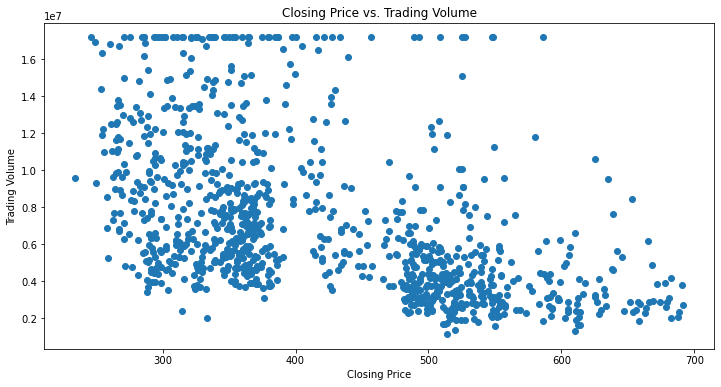

In [37]:
# What is the relationship between the closing price and trading volume?

plt.figure(figsize=(12, 6))
plt.scatter(stock_df['Close'], stock_df['Volume'])
plt.title("Closing Price vs. Trading Volume")
plt.xlabel("Closing Price")
plt.ylabel("Trading Volume")
plt.show()

In [38]:
# On which date did the stock experience the largest intraday price range (difference between the high and low prices), and what was the corresponding trading volume?

#Calculate the intraday price range
stock_df['intraday_range'] = stock_df['High'] - stock_df['Low']

# Find the date with the largest intraday price range

largest_range_date = stock_df.loc[stock_df['intraday_range'].idxmax(), 'Date']
largest_range = stock_df['intraday_range'].max()

#Find the trading volume corresponding to the largest intraday price range
volume_largest_range = stock_df.loc[stock_df['intraday_range'].idxmax(), 'Volume']

print("Date with the largest intraday price range:", largest_range_date)
print("Largest intraday price range:", largest_range)
print("Trading volume corresponding to the largest intraday price range:", volume_largest_range)


Date with the largest intraday price range: 2020-08-26 00:00:00
Largest intraday price range: 56.959991
Trading volume corresponding to the largest intraday price range: 17168150


* This code snippet calculates the intraday price range by subtracting the low prices from the high prices. It then finds the date with the largest intraday price range using the idxmax() function. Finally, it retrieves the trading volume corresponding to that date and prints all the required information.

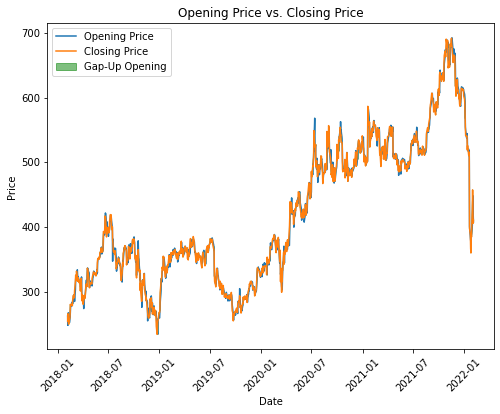

Number of gap-up opening days: 570


In [39]:
# How many days did the stock experience a gap-up opening (opening price higher than the previous day's closing price)?

gap_up_days = len(stock_df[stock_df['Open'] > stock_df['Close'].shift()])

plt.figure(figsize=(8, 6))
plt.plot(stock_df['Date'], stock_df['Open'], label='Opening Price')
plt.plot(stock_df['Date'], stock_df['Close'], label='Closing Price')

plt.title("Opening Price vs. Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")

plt.fill_between(stock_df['Date'], stock_df['Open'], stock_df['Close'], 
                 where = stock_df['Open'] > stock_df['Close'].shift(), color='g', alpha=0.5, label='Gap-Up Opening')
plt.legend()
plt.xticks(rotation=45)
plt.show()

print("Number of gap-up opening days:", gap_up_days)

#### Insights:

1. The insight gained from this analysis is the count of gap-up opening days, which indicates the frequency with which the stock experienced a positive gap between consecutive day's closing and opening prices.
2. A positive gap refers to a scenario where the opening price of a stock is higher than the previous day's closing price.

### ML Model Building

Stages:
<ul>
<li>Step1: Loading Data
<li>Step2: Train and Test data split
<li>Step3: Training the model
<li>Step4: Testing the model
<li>Step5: Evaluating Model Performance
</ul>

The following ML models are built for Stock Price:
<ul><li>Predict the Closing of incoming Stock Price.
<li>Automated classification of incoming cars</ul>

#### Step1: Loading Data

In [40]:
# The previously imported DataFrame: stock_df will be used for model building
stock_df

,Date,Open,High,Low,Close,Volume,intraday_range
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,17.869995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,21.700012
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,8.120025
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,17.619995
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,19.690002
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,17168150,29.500000
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,17168150,32.940002
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,25.500000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,24.980011


#### Linear Regression model 

Predictors and Target:
<ul><li>The predictors are the variables that are used to predict the target. All columns excluding Date, Open, High, Low, Volume and Intraday_range are considered as predictors.
<li>The target variable is 'Close' which has to be predicted.</ul>


In [41]:
X  = stock_df[['Open','High','Low','Volume', 'intraday_range']]
y = stock_df['Close']

#### Step2: Train and Test data split

The data must be divided into two parts. First, a training set on which model can be trained. Second, a testing set on which the model can be validated.

In [42]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y , train_size = 0.8,  random_state = 42)

In [43]:
X_train.shape

(807, 5)

In [44]:
X_test.shape

(202, 5)

#### Step3: Training the model

In [45]:
# importing the algorithm 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 

In [46]:
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
#Checking the coefficient(slope) and intercepts

m = regressor.coef_
c = regressor.intercept_

print('Slope:', m, '\nY intercept: ',c)

Slope: [-6.30879465e-01  8.18845196e-01  8.11298142e-01  6.66572236e-08
  7.54705400e-03] 
Y intercept:  0.07881145533377776


##### Step4: Testing the model

* The trained lclassification model is used for prediction against the training and testing data set.

In [48]:
#Predicting the target: Close against the predictors in the training data set
#Predicted data stored in y_pred_train

y_pred_train = regressor.predict(X_train)

In [49]:
#Predicting the target: closing against the predictors in the testing data set
#Predicted data stored in y_pred_test

y_pred_test = regressor.predict(X_test)

In [50]:
predicted = regressor.predict(X_test)

In [51]:
print(X_test)

           Open        High         Low    Volume  intraday_range
628  498.649994  510.440002  498.649994   5608000       11.790008
631  505.450012  508.290009  486.679993   5910300       21.610016
741  507.350006  514.500000  499.579987   4177400       14.920013
514  385.329987  387.320007  377.899994   3930100        9.420013
365  323.399994  325.850006  314.230011  16302500       11.619995
..          ...         ...         ...       ...             ...
780  512.500000  526.510010  506.589996   3981700       19.920014
334  354.380005  357.880005  348.709991   5020100        9.170014
210  288.130005  295.739990  274.720001  12800600       21.019989
350  363.200012  370.850006  363.200012   4138600        7.649994
78   351.500000  356.100006  346.709991   9717900        9.390015

[202 rows x 5 columns]


In [52]:
predicted.shape

(202,)

In [53]:
dframe = pd.DataFrame(y_test,predicted)

In [54]:
df = pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [55]:
print(df)

         Actual   Predicted
628  509.640015  508.478721
631  494.730011  492.811241
741  500.859985  506.997336
514  380.070007  381.059789
365  315.100006  318.981709
..          ...         ...
780  518.020020  519.294547
334  355.730011  352.867667
210  275.329987  284.360496
350  370.019989  369.609226
78   349.730011  351.919266

[202 rows x 2 columns]


In [68]:
df.head(25)

,Actual,Predicted
628,509.640015,508.478721
631,494.730011,492.811241
741,500.859985,506.997336
514,380.070007,381.059789
365,315.100006,318.981709
656,476.260010,480.261480
657,495.989990,493.304894
530,298.839996,320.546019
321,359.309998,360.968113
70,328.190002,328.289900


<AxesSubplot:>

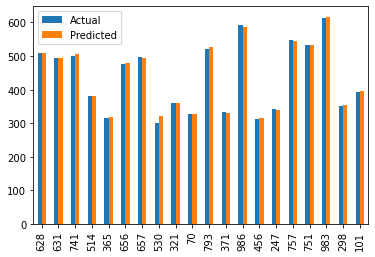

In [67]:
graph.plot(kind='bar')

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

#### Step5: Evaluating Model Performance

* There are different metrics used to evaluate the performance of the model. Here the accuracy score is used.

In [58]:
Accuracy_score = regressor.score(X_test,y_test)

print('Accuracy_score: ', Accuracy_score)

Accuracy_score:  0.9986351577314989


### Regression model evaluation metrics

The MSE, MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.
 
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

In [59]:
import math

In [60]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 2.8249810528375887


In [61]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 15.91414101677302


In [62]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 3.9892531903569393
